In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.mpl_style = 'default'

## Recall from From Verena's lecture on Tuesday 9/4/2014

Previously discussed: 

* How to load a .txt file into a pandas DataFrame
* Bar plots in matplotlib
* Selecting a column from a DataFrame (subFrame)

## Today, we will discuss the following:
* Reading in a CSV file into a pandas DataFrame
* Using histograms, scatterplots and boxplots as exploratory data analysis
* Summary statistics
* Functions to access a pandas DataFrame
* Defining your own functions and using loops

<a href=https://raw.githubusercontent.com/cs109/2014/master/labs/Lab2_Notes.ipynb download=HW1.ipynb> Download this notebook from Github </a>

#### Important: Tips for good Python Coding Practices 

1. Always comment the code, avoiding inline comments
2. Define functions to do commands that you have to do repeatedly; use docstrings when defining a function.
3. Use xrange instead of range when simply iterating a procedure N times (iterator instead of actual list built in memory).
4. Be aware of what parts of the code take the most time to run and plan accordingly (especially web requests, they tend to take a while)
5. Don't write long lines (we shouldn't have to scroll to see the whole line of code)


## Diamonds Data

This data set contains the prices and other attributes of almost 54,000 diamonds. This dataset is available on Github in the [2014_data repository](https://github.com/cs109/2014_data) and is called `diamonds.csv`.  


## Reading in the diamonds data (CSV file) from the web

This is a `.csv` file, so we will use the function `read_csv()` that will read in a CSV file into a pandas DataFrame. 

In [2]:
url = 'https://raw.githubusercontent.com/cs109/2014_data/master/diamonds.csv'
diamonds = pd.read_csv(url, sep = ',', index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


Here is a table containing a description of all the column names. 

Column name | Description 
--- | --- 
carat | weight of the diamond (0.2–5.01)
cut | quality of the cut (Fair, Good, Very Good, Premium, Ideal)
colour | diamond colour, from J (worst) to D (best)
clarity | a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best))
depth | total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
table | width of top of diamond relative to widest point (43–95)
price | price in US dollars (\$326–\$18,823)
x | length in mm (0–10.74)
y | width in mm (0–58.9)
z | depth in mm (0–31.8)

## Exploratory Data Analysis (EDA)

The variables `carat` and `price` are both continuous variables, while `color` and `clarity` are discrete variables. First, let's look at some summary statistics of the diamonds data set. 

In [3]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Let's look at the distribution of carats and price using a histogram.

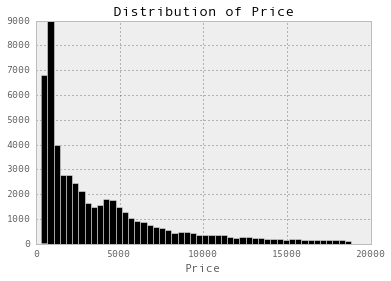

In [8]:
diamonds['price'].hist(bins=50, color = 'black')
plt.title('Distribution of Price')
plt.xlabel('Price')

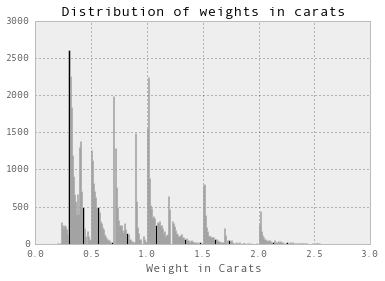

In [11]:
# Try changing bin size from 20 to 500. What do you notice? 
diamonds['carat'].hist(bins=500, color = 'black', figsize=(6, 4))
plt.title('Distribution of weights in carats')
plt.xlim(0, 3)
plt.xlabel('Weight in Carats')

Plot the density of the price of the diamonds

1     326
2     326
3     327
4     334
5     335
6     336
7     336
8     337
9     337
10    338
11    339
12    340
13    342
14    344
15    345
...
53926    2756
53927    2756
53928    2756
53929    2756
53930    2756
53931    2756
53932    2756
53933    2757
53934    2757
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: price, Length: 53940, dtype: int64


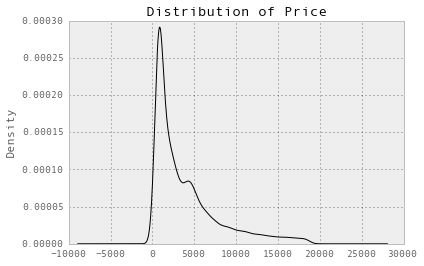

In [18]:
print diamonds['price']
diamonds['price'].plot(kind='kde', color = 'black')
plt.title('Distribution of Price')

Now, let's look at the relationship between the price of a diamond and its weight in carats. Try changing alpha (ranges from 0 to 1) to control over plotting. 

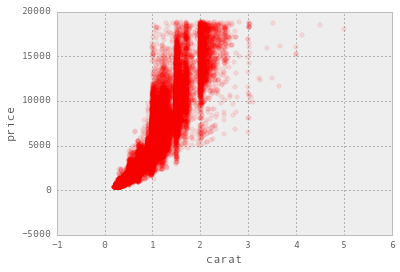

In [20]:
diamonds.plot(x='carat', y='price', kind = 'scatter', color = 'red', alpha = .1)

We can also create a scatter plot using matplotlib.pyplot instead of pandas directly.

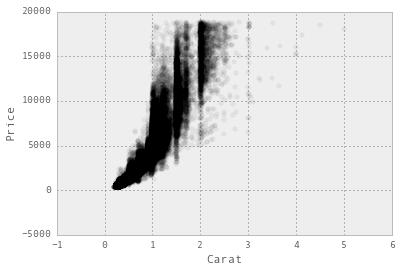

In [21]:
plt.scatter(diamonds['carat'], diamonds['price'], color = 'black', alpha = 0.05)
plt.xlabel('Carat')
plt.ylabel('Price')

Let's look at the scatter plots of `price` and `carat` but grouped by color.  

color
D        Axes(0.125,0.125;0.775x0.775)
E        Axes(0.125,0.125;0.775x0.775)
F        Axes(0.125,0.125;0.775x0.775)
G        Axes(0.125,0.125;0.775x0.775)
H        Axes(0.125,0.125;0.775x0.775)
I        Axes(0.125,0.125;0.775x0.775)
J        Axes(0.125,0.125;0.775x0.775)
dtype: object

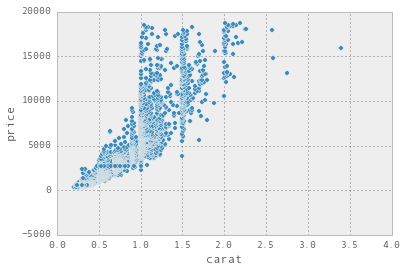

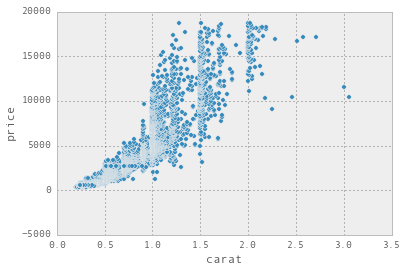

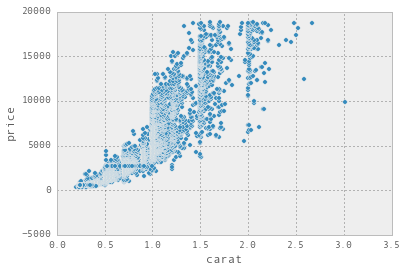

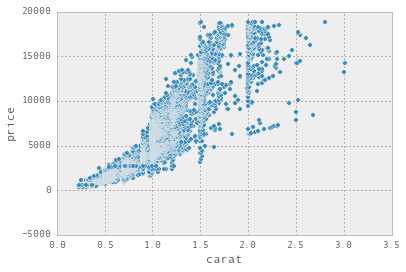

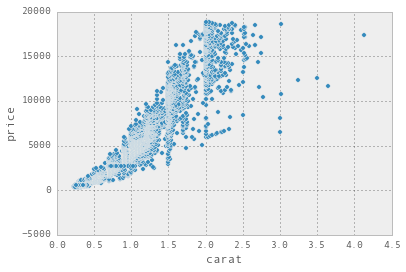

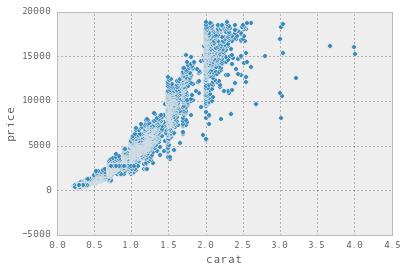

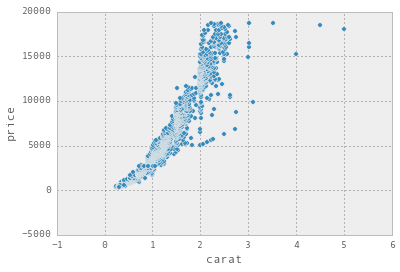

In [16]:
diamonds.groupby('color').plot(x='carat', y='price', kind = 'scatter', color = 'black', alpha = 1)

What happens if you look at the scatter plots of `price` and `carat` but grouped by clarity.  

clarity
I1         Axes(0.125,0.125;0.775x0.775)
IF         Axes(0.125,0.125;0.775x0.775)
SI1        Axes(0.125,0.125;0.775x0.775)
SI2        Axes(0.125,0.125;0.775x0.775)
VS1        Axes(0.125,0.125;0.775x0.775)
VS2        Axes(0.125,0.125;0.775x0.775)
VVS1       Axes(0.125,0.125;0.775x0.775)
VVS2       Axes(0.125,0.125;0.775x0.775)
dtype: object

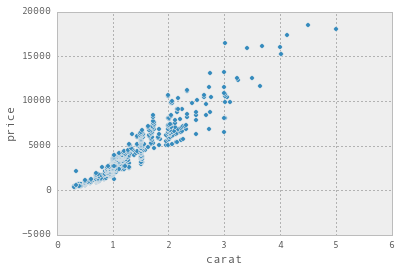

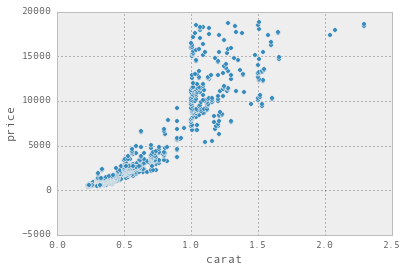

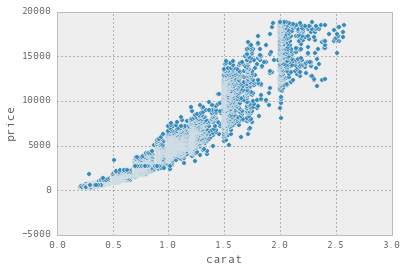

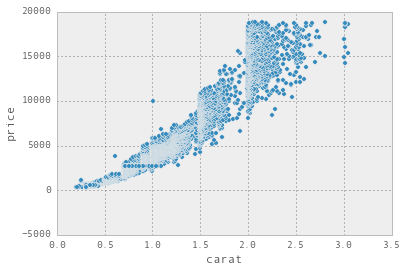

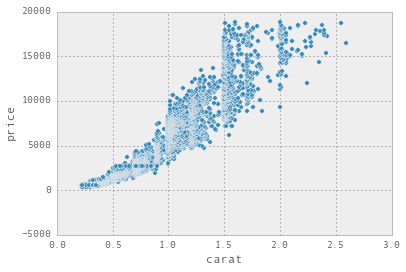

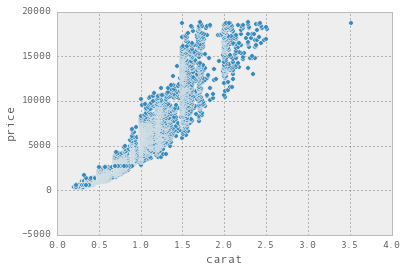

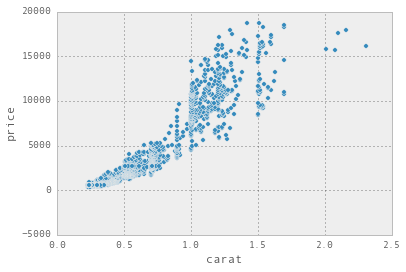

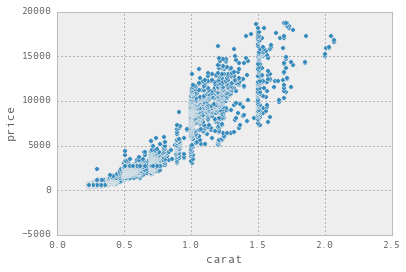

In [26]:
# try here
diamonds.groupby('clarity').plot(x='carat', y='price', kind='scatter', color='black', alpha=1)
# diamonds.groupby('clarity').plot(x='carat', y='depth', kind='scatter', color='black', alpha=1)

We could also look at boxplots of the `price` grouped by `color`.  

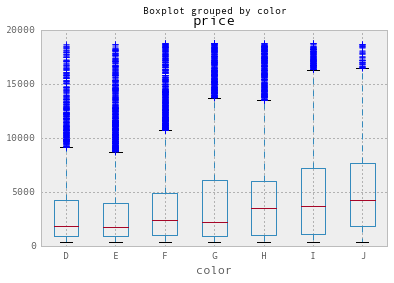

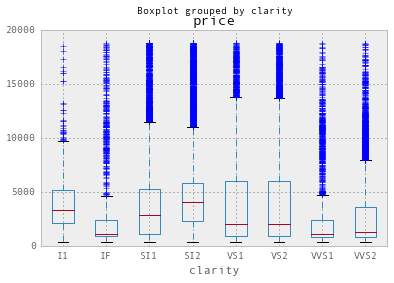

In [29]:
diamonds.boxplot('price', by = 'color')
diamonds.boxplot('price', by = 'clarity')

## More with pandas

Now that we have done some exploratory data analysis by looking at histograms, scatter plots and boxplots let's look more about how to work with the pandas DataFrame itself.  

#### More summary statistics

We just learned about `diamonds.describe()` above, what else can we do? 

In [12]:
diamonds.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [13]:
diamonds.corr() # correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [14]:
diamonds.var() # variance

carat           0.224687
depth           2.052404
table           4.992948
price    15915629.424301
x               1.258347
y               1.304472
z               0.498011
dtype: float64

In [33]:
diamonds.sort('price', ascending = True, inplace = False).head() # sorting
# diamonds.sort('price', ascending = True, inplace = True).head() # sorting

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


## Accessing functions for a panda DataFrame

In [16]:
subtable = diamonds.iloc[0:2, 0:2]
print "subtable"
print subtable
print ""

column = diamonds['color']
print "head of  the color column"
print column.head()
print ""

row = diamonds.ix[1:2] #row 1 and 2
print "row"
print row
print ""

rows = diamonds.ix[:3] # all the rows before 3
print "rows"
print rows
print ""

color = diamonds.ix[1,'color']
print "color of diamond in row 1"
print color
print ""

# max along column
print "max price %g" % diamonds['price'].max() 
print ""

# axes
print "axes"
print diamonds.axes
print ""

row = diamonds.ix[1]
print "row info"
print row.name
print row.index
print ""

subtable
   carat      cut
1   0.23    Ideal
2   0.21  Premium

head of the color column
1    E
2    E
3    E
4    I
5    J
Name: color, dtype: object

row
   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5     55    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8     61    326  3.89  3.84  2.31

rows
   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5     55    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8     61    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9     65    327  4.05  4.07  2.31

color of diamond in row 1
E

max price 18823

axes
[Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

## Defining your own functions

New functions can be defined using one of the 31 keywords in Python: `def`.  

In [20]:
def squared(x):
    """ Return the square of a  
        value """
    return x ** 2

squared(4)

16

The first line of the function (the header) must start with the keyword `def`, the name of the function (which can contain underscores), parentheses (with any arguments inside of it) and a colon.  The arguments can be specified in any order. 

The rest of the function (the body) always has an indentation of four spaces.  If you define a function in the interactive mode, the interpreter will print ellipses (...) to let you know the function isn't complete. To complete the function, enter an empty line (not necessary in a script).  

To return a value from a function, use `return`. The function will immediately terminate and not run any code written past this point.

#### The docstring
When defining new functions, you can add a `docstring` (i.e. the documentation of function) at the beginning of the function that documents what the function does. The docstring is a triple quoted (multi-line) string.  We highly recommend you to document the functions you define as good python coding practice. 

#### Lambda functions
Lambda functions are one-line functions. To define this function using the `lambda` keyword, you do not need to include the `return` argument.  For example, we can re-write the `squared()` function above using the following syntax:

In [18]:
f = lambda x: x**2
f(4)

16

## For loops and while loops

#### For loops
Defining a `for` loop is similar to defining a new function. The header ends with a colon and the body is indented with four spaces. The function `range(n)` takes in an integer n and creates a set of values from 0 to n - 1.  `for` loops are not just for counters, but they can iterate through many types of objects such as strings, lists and dictionaries. 

In [19]:
for i in range(4):
    print 'Hello world!'

Hello world!
Hello world!
Hello world!
Hello world!


To traverse through all characters in a given string, you can use `for` or `while` loops. Here we create the names of the duck statues in the Public Gardens in downtown Boston: Jack, Kack, Lack, Mack, Nack, Oack, Pack, Qack. 

In [20]:
prefixes = 'JKLMNOPQ'
suffix = 'ack'
for letter in prefixes:
    print letter + suffix

Jack
Kack
Lack
Mack
Nack
Oack
Pack
Qack


#### while loops
Defining a `while` loop is again similar to defining a `for` loop or new function. The header ends with a colon and the body is indented with four spaces. 

In [21]:
def countdown(n):
    while n > 0:
        print n
        n = n-1
    print 'Blastoff!'

countdown(3)

3
2
1
Blastoff!


#### List comprehensions
Another powerful feature of Python is **list comprehension** which maps one list onto another list and applying a function to each element.  Here, we take each element in the list `a` (temporarily assigning it the value i) and square each element in the list. This creates a new list and does not modify `a`.  In the second line, we can add a conditional statements of only squaring the elements if the element is not equal to 10.

In [22]:
a = [5, 10, 15, 20]
b = [i**2 for i in a]
c = [i**2 for i in a if i != 10]

print "a: ", a
print "b: ", b
print "c: ", c

a:  [5, 10, 15, 20]
b:  [25, 100, 225, 400]
c:  [25, 225, 400]


In [21]:
print a

NameError: name 'a' is not defined